In [255]:
import pandas as pd
import datetime

In [256]:
date = datetime.datetime.date(datetime.datetime.now())

In [257]:
today = f"{str(date.day)}-{str(date.month)}-{str(date.year)}"

In [258]:
df = pd.read_csv('./results/hackerRank_at-'+today+".csv")

In [259]:
df.columns

Index(['Unnamed: 0', 'username', 'RollNumber', 'oneStarBadge', 'twoStarBadge',
       'threeStarBadge', 'fourStarBadge', 'fiveStarBadge', 'basic_Certificate',
       'intermediate_Certificate', 'adavanced_Certificate'],
      dtype='object')

In [260]:
df.describe()

,Unnamed: 0,oneStarBadge,twoStarBadge,threeStarBadge,fourStarBadge,fiveStarBadge,basic_Certificate,intermediate_Certificate,adavanced_Certificate
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,402.000000,0.228571,0.247205,0.247205,0.229814,0.243478,0.491925,0.022360,0.008696
std,232.527776,0.544012,0.501002,0.536951,0.509224,0.496603,0.931215,0.147944,0.092902
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,804.000000,3.000000,3.000000,3.000000,3.000000,2.000000,5.000000,1.000000,1.000000


In [261]:
BadgeCount = {
    "NumberOfoneStarBadge": int(df['oneStarBadge'].sum()),
    "NumberOftwoStarBadge": int(df['twoStarBadge'].sum()),
    "NumberOfthreeStarBadge": int(df['threeStarBadge'].sum()),
    "NumberOffourStarBadge": int(df['fourStarBadge'].sum()),
    "NumberOffiveStarBadge": int(df['fiveStarBadge'].sum()),
    "NumberOfbasic_Certificate": int(df['basic_Certificate'].sum()),
    "NumberOfintermediate_Certificate": int(df['intermediate_Certificate'].sum()),
    "NumberOfadavanced_Certificate": int(df['adavanced_Certificate'].sum())
}


In [262]:
BadgeCount

{'NumberOfoneStarBadge': 184,
 'NumberOftwoStarBadge': 199,
 'NumberOfthreeStarBadge': 199,
 'NumberOffourStarBadge': 185,
 'NumberOffiveStarBadge': 196,
 'NumberOfbasic_Certificate': 396,
 'NumberOfintermediate_Certificate': 18,
 'NumberOfadavanced_Certificate': 7}

In [263]:
import matplotlib.pyplot as plt

In [264]:
teal_palette = [
          '#e0f5f8',
          '#b8e4e5',
          '#90d3d4',
          '#68c2c3',
          '#40b1b2',
        ]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=teal_palette[::-1])

In [265]:
badge_labels = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
badge_values = [
    BadgeCount["NumberOfoneStarBadge"],
    BadgeCount["NumberOftwoStarBadge"],
    BadgeCount["NumberOfthreeStarBadge"],
    BadgeCount["NumberOffourStarBadge"],
    BadgeCount["NumberOffiveStarBadge"]
]

certificate_labels = ['Basic', 'Intermediate', 'Advanced']
certificate_values = [
    BadgeCount["NumberOfbasic_Certificate"],
    BadgeCount["NumberOfintermediate_Certificate"],
    BadgeCount["NumberOfadavanced_Certificate"]
]

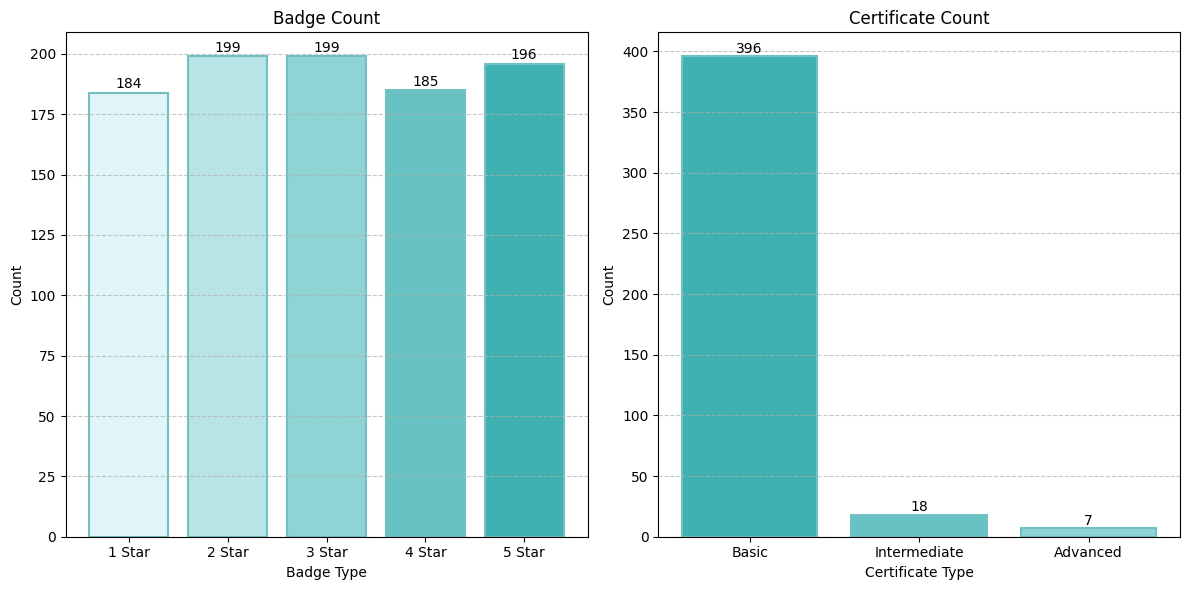

In [266]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bars = plt.bar(badge_labels, badge_values,
                color=teal_palette, edgecolor='#72c0c1', linewidth=1.5)
plt.title('Badge Count')
plt.xlabel('Badge Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             str(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.subplot(1, 2, 2)
bars = plt.bar(certificate_labels, certificate_values, 
               color=teal_palette[::-1], edgecolor='#72c0c1', linewidth=1.5)
plt.title('Certificate Count')
plt.xlabel('Certificate Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             str(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# -------------------------- Course Analysis -------------------------

In [267]:
import json

In [268]:
with open(f"results/hackerRank_courses_at-{str(date.day)+"-"+str(date.month)+"-"+str(date.year)}.json", "r") as json_file:
    jsoned_course_data = json.load(json_file)

In [269]:
all_badges_titles = set()
all_certificate_titles = set()
for dct in jsoned_course_data:
    for badge in dct['badges']:
        all_badges_titles.add(badge)
    for certificate in dct['certificates']:
        all_certificate_titles.add(certificate)

In [270]:
columnNames = ['RollNumber','Name','Username']
for i in all_badges_titles:
    columnNames.append('Badge('+i+')')

for i in all_certificate_titles:
    columnNames.append('Certificate('+i+')')

columnNames


['RollNumber',
 'Name',
 'Username',
 'Badge(React)',
 'Badge(Days of Code)',
 'Badge(Problem Solving)',
 'Badge(C language)',
 'Badge(Python)',
 'Badge(CPP)',
 'Badge(Java)',
 'Badge(Sql)',
 'Certificate(CSS)',
 'Certificate(Problem Solving)',
 'Certificate(Python)',
 'Certificate(C# )',
 'Certificate(JavaScript)',
 'Certificate(SQL)',
 'Certificate(Java)']

In [271]:
# data = [[] for _ in columnNames]

# for i in jsoned_course_data:
#     data[0].append(i['RollNumber'])
#     data[1].append(i['name'])
#     data[2].append(i['username'])
#     print(i)

In [272]:
flattened_data = []
for record in jsoned_course_data:
    flattened_record = {
        'RollNumber': record['RollNumber'],
        'username': record['username'],
        'name': record['name'],
    }
    
    badges = record.get('badges', {}) 
    if isinstance(badges, dict): 
        for badge, count in badges.items():
            flattened_record[f'{badge} badge'] = count
    
    certificates = record.get('certificates', {})  
    if isinstance(certificates, dict):  
        for cert, level in certificates.items():
            if level == 'Basic':
                flattened_record[f'{cert} certificate'] = 1
            elif level == 'Intermediate':
                flattened_record[f'{cert} certificate'] = 2
            elif level == 'Advanced':
                flattened_record[f'{cert} certificate'] = 3
            else:
                flattened_record[f'{cert} certificate'] = 0
                print(record,cert,level)
    flattened_data.append(flattened_record)


In [273]:
df2 = pd.DataFrame(flattened_data)
df2

,RollNumber,username,name,Sql badge,Python certificate,Problem Solving badge,C language badge,SQL certificate,Python badge,CSS certificate,Java badge,Problem Solving certificate,Java certificate,JavaScript certificate,Days of Code badge,C# certificate,CPP badge,React badge
0,23955A6701,@sadhuakshaya076,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23955A6703,@bhavani_ramagani,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22951A0487,@mahithapenkey,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23955A6614,23955a6614 sai ganesh,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22951A0562,@kanchanthapa446,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,22951A3364,Potu Poojitha reddy,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,22951A05A8,@hany_mohdharshad,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802,22951A0505,Adithya Chukkala,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803,22951A3385,@22951a3385,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
df2.columns

Index(['RollNumber', 'username', 'name', 'Sql badge', 'Python certificate',
       'Problem Solving badge', 'C language badge', 'SQL certificate',
       'Python badge', 'CSS certificate', 'Java badge',
       'Problem Solving certificate', 'Java certificate',
       'JavaScript certificate', 'Days of Code badge', 'C#  certificate',
       'CPP badge', 'React badge'],
      dtype='object')

In [275]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RollNumber                   805 non-null    object 
 1   username                     780 non-null    object 
 2   name                         470 non-null    object 
 3   Sql badge                    397 non-null    float64
 4   Python certificate           122 non-null    float64
 5   Problem Solving badge        108 non-null    float64
 6   C language badge             76 non-null     float64
 7   SQL certificate              119 non-null    float64
 8   Python badge                 234 non-null    float64
 9   CSS certificate              21 non-null     float64
 10  Java badge                   129 non-null    float64
 11  Problem Solving certificate  48 non-null     float64
 12  Java certificate             82 non-null     float64
 13  JavaScript certifica

In [276]:
df2.describe()

,Sql badge,Python certificate,Problem Solving badge,C language badge,SQL certificate,Python badge,CSS certificate,Java badge,Problem Solving certificate,Java certificate,JavaScript certificate,Days of Code badge,C# certificate,CPP badge,React badge
count,397.000000,122.0,108.000000,76.000000,119.000000,234.000000,21.0,129.000000,48.0,82.0,6.0,12.000000,4.0,6.000000,1.0
mean,3.672544,1.0,1.814815,2.355263,1.226891,3.141026,1.0,2.224806,1.0,1.0,1.0,2.166667,1.0,2.833333,1.0
std,1.262744,0.0,0.866275,1.261787,0.543638,1.307532,0.0,1.238953,0.0,0.0,0.0,1.267304,0.0,0.752773,NaN
min,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,2.000000,1.0
25%,3.000000,1.0,1.000000,1.000000,1.000000,2.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,2.250000,1.0
50%,4.000000,1.0,2.000000,2.000000,1.000000,3.000000,1.0,2.000000,1.0,1.0,1.0,2.000000,1.0,3.000000,1.0
75%,5.000000,1.0,2.000000,3.000000,1.000000,4.000000,1.0,3.000000,1.0,1.0,1.0,2.250000,1.0,3.000000,1.0
max,5.000000,1.0,5.000000,5.000000,3.000000,5.000000,1.0,5.000000,1.0,1.0,1.0,5.000000,1.0,4.000000,1.0


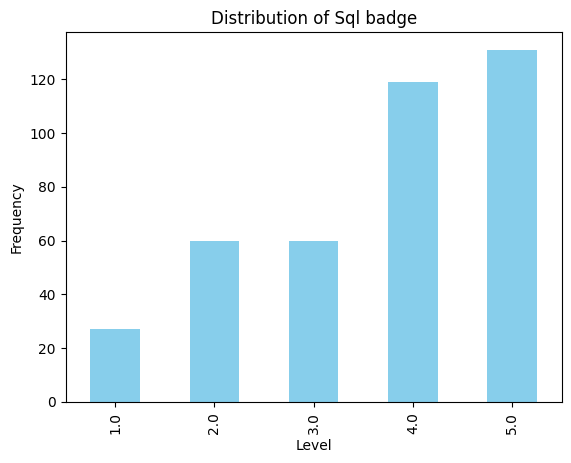

The total sum of Sql badge is 397


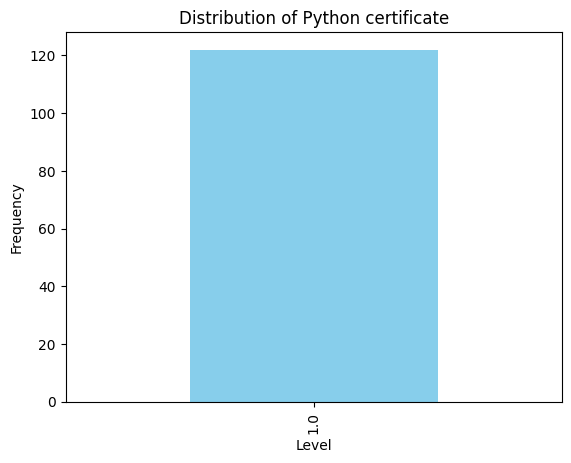

The total sum of Python certificate is 122


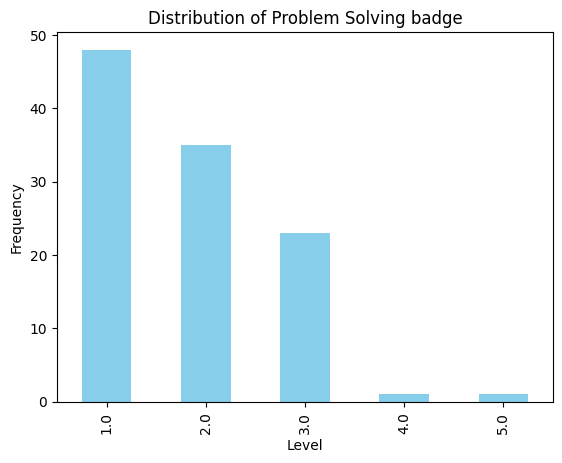

The total sum of Problem Solving badge is 108


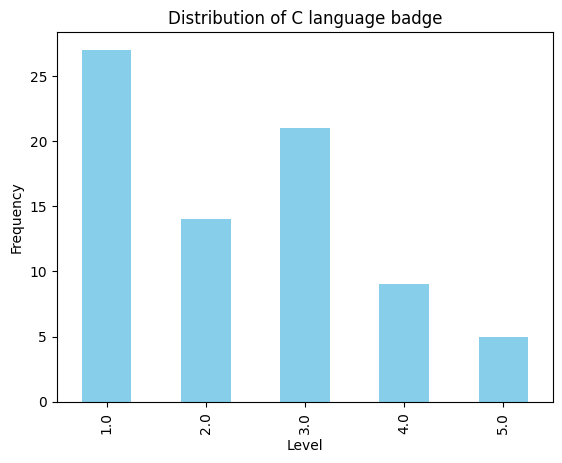

The total sum of C language badge is 76


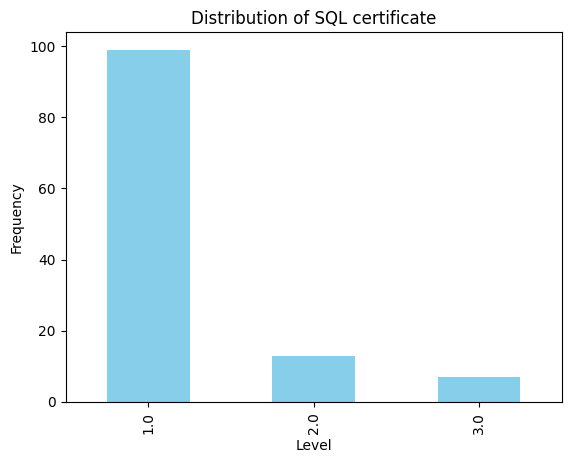

The total sum of SQL certificate is 119


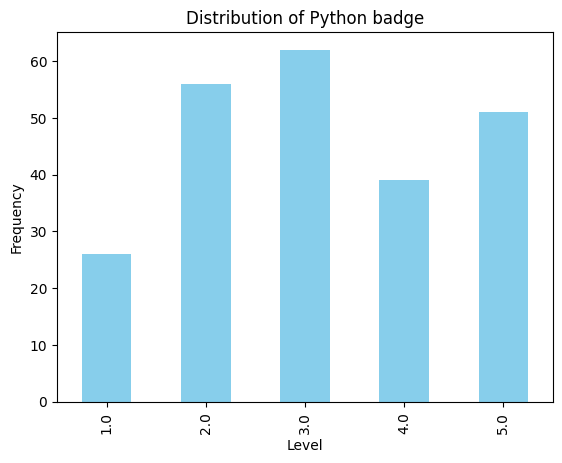

The total sum of Python badge is 234


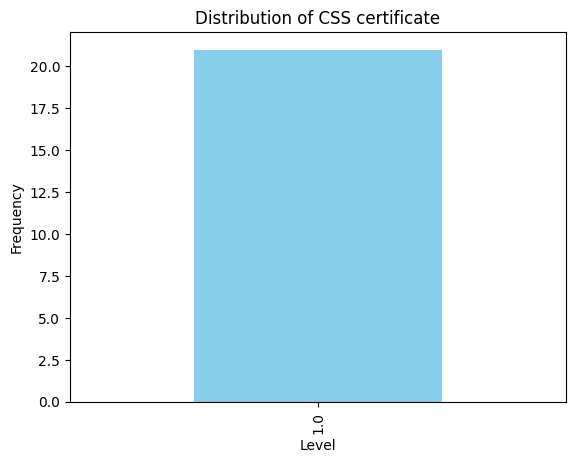

The total sum of CSS certificate is 21


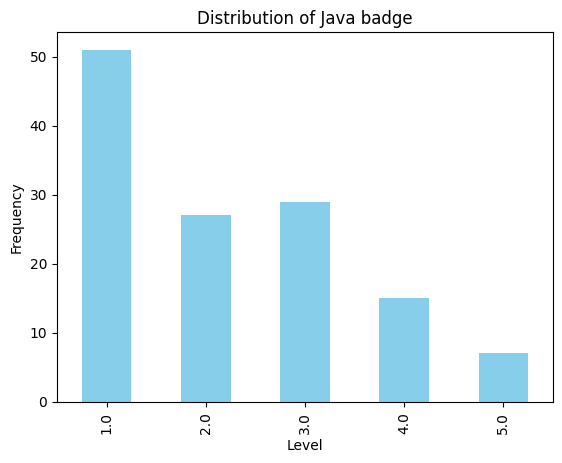

The total sum of Java badge is 129


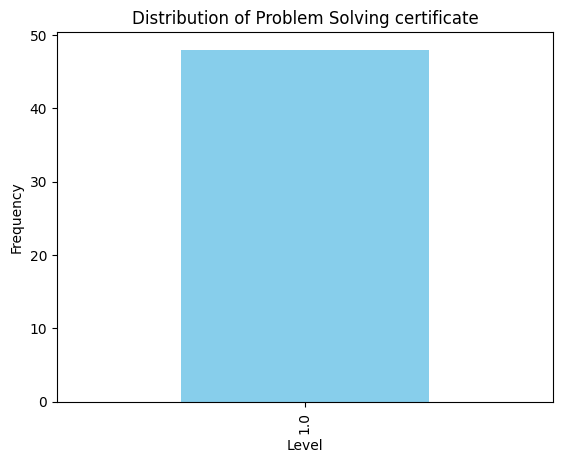

The total sum of Problem Solving certificate is 48


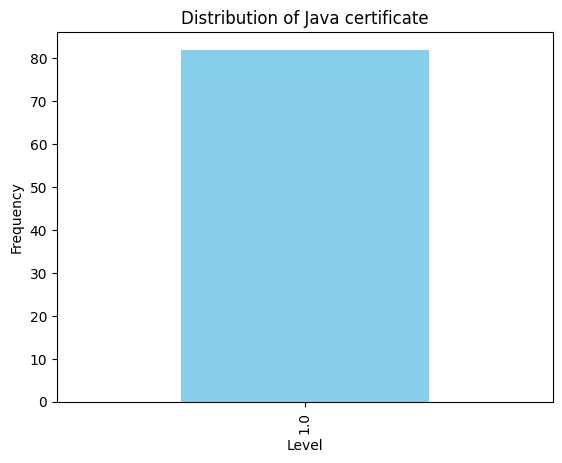

The total sum of Java certificate is 82


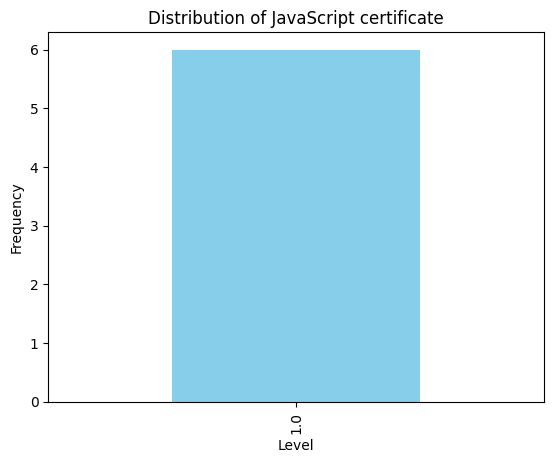

The total sum of JavaScript certificate is 6


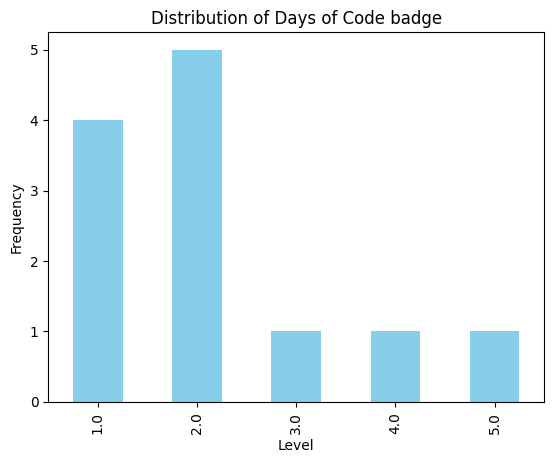

The total sum of Days of Code badge is 12


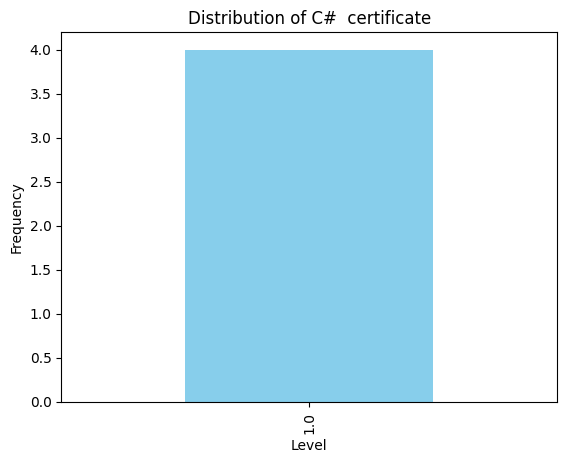

The total sum of C#  certificate is 4


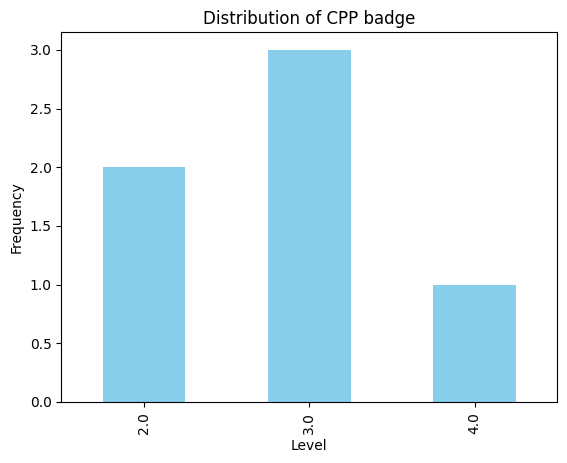

The total sum of CPP badge is 6


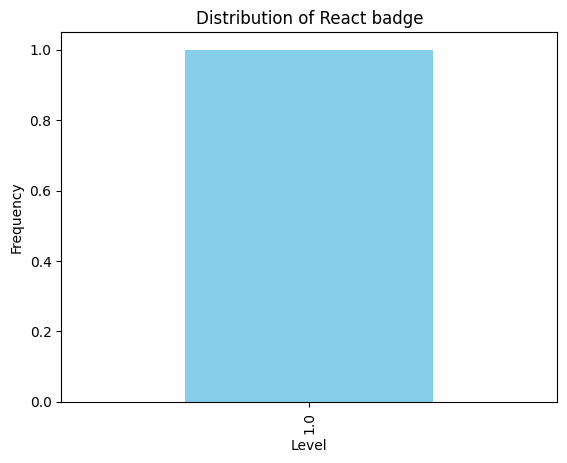

The total sum of React badge is 1


In [277]:
for i in df2.columns[3:]:
    df2[i].dropna().value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {i}')
    plt.xlabel('Level')
    plt.ylabel('Frequency')
    plt.show()
    print(f"The total sum of {i} is",df2[i].dropna().value_counts().sum())

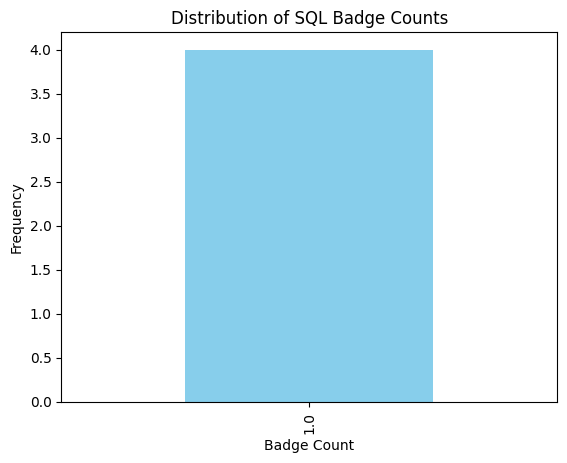

In [278]:
df2['C#  certificate'].dropna().value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.title('Distribution of SQL Badge Counts')
plt.xlabel('Badge Count')
plt.ylabel('Frequency')

plt.show()